<a href="https://colab.research.google.com/github/afrojaakter/Traditional-ML-Models/blob/main/Na%C3%AFve_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Naïve Bayes Classifier Algorithm:

- Naïve Bayes algorithm is supervised learning algorithm, which is based on Bayes theoren and used for solving classification problems (e.g., text classification which includes a high-dimensional traning dataset, spam filtration, Sentimental analysis, classifying articles.)

- It is one of the simple and most effective classification algorithm which helps in building the fast machine learning models that can make quick predictions

- It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

###Why is it called Naïve Bayes?
- *Naïve*: It is callded Naïve because it assumes the occurrence of a certain feature is independent of the occurrence of other features. i.e., each feature makes an independent and equal contribution to the model output.  Note: This assumption is not true in real world situation.

- *Bayes*: It is called bayes because it depends on the principle of Bayes' Rule.

Bayes Rule is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
 $$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
 where,
 
 $P(A|B) = $  Posterior

 $P(B|A) = $ Likelihood

 $P(A) = $ Prior

 $P(B) = $ Marginal Probability


 ###Working of Naïve Bayes' Classifier:



###Python Implementation of the Naïve Bayes algorithm:
*Steps*:

- Data Preprocessing step

- Fitting Naive Bayes to the Training set

- Predicting the test result

- Test accuracy of the result(Creation of Confusion matrix)

- Visualizing the test set result.

### Text data
I will use multi-class (20 classes) test data and build a Naive Bayes model to predict the categories of the texts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

sns.set()

In [2]:
#Load dataset
data = fetch_20newsgroups()

#Get the text categories
text_categories = data.target_names

#Define train and test data set
train_date = fetch_20newsgroups(subset="train", categories=text_categories)

test_data = fetch_20newsgroups(subset="test", categories=text_categories)

20 unique classes
11314 traning samples
7532 test samples


In [3]:
#Let’s see the number of classes and samples.
print("{} unique classes".format(len(text_categories)))
print("{} traning samples".format(len(train_date.data)))
print("{} test samples".format(len(test_data.data)))

20 unique classes
11314 traning samples
7532 test samples


In [15]:
# print one sample of training data
print(train_date.data[1])
print(train_date.target_names)
print(train_date.target[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.fors

As we see this is email data

In [8]:
#Build Naibe Bayes classifier model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
#Train the model
model.fit(train_date.data, train_date.target)
#prediction
predicted_catagories = model.predict(test_data.data)


In [9]:
# Let's take a look at the predicted categories
print(np.array(test_data.target_names)[predicted_catagories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


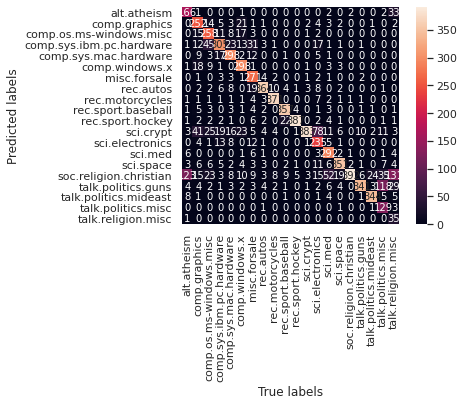

In [18]:
## plot the confusion matrix
mat = confusion_matrix(test_data.target, predicted_catagories)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", 
            xticklabels=train_date.target_names, 
            yticklabels=train_date.target_names)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.show()

In [36]:
print("The accuracy is {}"\
      .format(accuracy_score(test_data.target, predicted_catagories)))

The accuracy is 0.7738980350504514


In [38]:
# test the model prediction on some random sentences
def predited_category(sentence, model):
    all_categories_names = np.array(data.target_names)
    prediction = model.predict([sentence])
    return all_categories_names[prediction]

sentence1 = "football"
print(predited_category(sentence1, model))

sentence2 = "Are you an atheist?"
print(predited_category(sentence2, model))


['rec.sport.baseball']
['alt.atheism']


Refernce: [java point](https://www.javatpoint.com/clustering-in-machine-learning)